In [11]:
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("cleaned_data.csv")

In [13]:
df.columns = df.columns.str.replace(' ', '_')
df['AI_Impact'] = pd.to_numeric(df['AI_Impact'].str.rstrip('%'), errors='coerce')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Job_Title                  2318 non-null   object 
 1   Work_Type                  2318 non-null   object 
 2   Average_Normalized_Salary  2318 non-null   float64
 3   AI_Impact                  2318 non-null   int64  
 4   Tasks                      2318 non-null   int64  
 5   AI_Models                  2318 non-null   int64  
 6   AI_Workload_Ratio          2318 non-null   float64
 7   Domain                     2318 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 145.0+ KB


In [26]:
# numeric predictors
numeric_features = ['Average_Normalized_Salary', 'Tasks', 'AI_Models', 'AI_Workload_Ratio']
X_numeric = df[numeric_features].apply(pd.to_numeric, errors='coerce')

# categorical predictors
categorical_features = ['Domain']
X_categorical = pd.get_dummies(df[categorical_features], drop_first=True, dtype=float)

X = pd.concat([X_numeric, X_categorical], axis=1)

# drop NaNs and infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)
data = pd.concat([X, df['AI_Impact']], axis=1).dropna()


X_clean = data.drop('AI_Impact', axis=1)
y_clean = data['AI_Impact']
X_clean = sm.add_constant(X_clean)

model = sm.OLS(y_clean, X_clean).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AI_Impact   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     45.81
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.04e-105
Time:                        00:56:58   Log-Likelihood:                -9923.4
No. Observations:                2317   AIC:                         1.987e+04
Df Residuals:                    2303   BIC:                         1.996e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              67.1581      2.579     26.039      0.000      62.101      72.216
Average_Normalized_Salary        5.769e-09   1.17e-07      0.049      0.961   -2.24e-07    2.35e-07
Tasks                               0.0336      0.007      4.823      0.000       0.020       0.047
AI_Models                          -0.0137      0.002     -8.258      0.000      -0.017      -0.010
AI_Workload_Ratio                -107.2701     11.065     -9.695      0.000    -128.968     -85.572
Domain_Communication & PR           0.1950      1.616      0.121      0.904      -2.975       3.364
Domain_Construction                -0.9798      1.671     -0.586      0.558      -4.256       2.297
Domain_Data & IT                    0.5225      1.655      0.316      0.752      -2.724       3.769
Domain_Hospitality                 -2.3015      1.592     -1.446      0.148      -5.423       0.820
Domain_Law Enforcement             -0.2883      1.665     -0.173      0.863      -3.554       2.977
Domain_Leadership & Strategy        0.4095      1.623      0.252      0.801      -2.773       3.592
Domain_Medical & Healthcare         0.9634      1.614      0.597      0.551      -2.201       4.128
Domain_Sales & Marketing            1.6301      1.652      0.987      0.324      -1.609       4.869
Domain_Supply Chain & Logistics     0.9781      1.639      0.597      0.551      -2.236       4.193
==============================================================================
Omnibus:                       99.941   Durbin-Watson:                   1.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.458
Skew:                           0.539   Prob(JB):                     3.80e-25
Kurtosis:                       3.049   Cond. No.                     9.69e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.69e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The regression model generated an R-squared value of 0.205, which indicates that approximately 20.5% of the variation in AI Impact can be explained by the selected features. This shows a modest but meaningful predictive power. The F-statistic of 45.81 with a p-value of 4.04e-105, suggests that the model overall is statistically significant.

This analysis identified three features that are statistically significant predictors of AI Impact. The AI Workload Ratio has a coefficient of -107.27, with an extremely small p-value, indicating a strong negative relationship between AI Workload and AI Impact. This means that as the proportion of workload already influenced by AI increases, the perceived threat or impact from further AI integration decreases notably. Also, the number of Tasks has a coefficient of 0.0336, with an extremely small p-value, indicating a positive relationsip. This suggests that jobs with routine and repetivive human-performed tasks are  more susceptible to AI impact and automation. Lastly, the number of AI Models has a coefficient of -0.0137, with a p-value less than 0.001, showing a small but statistically significant negative relationship. This means that jobs with a large number of AI models are at a lower threat. Other predictors, such as Average Normalized Salary and all industry-specific domains were not statistically significant (p-values > 0.05). 

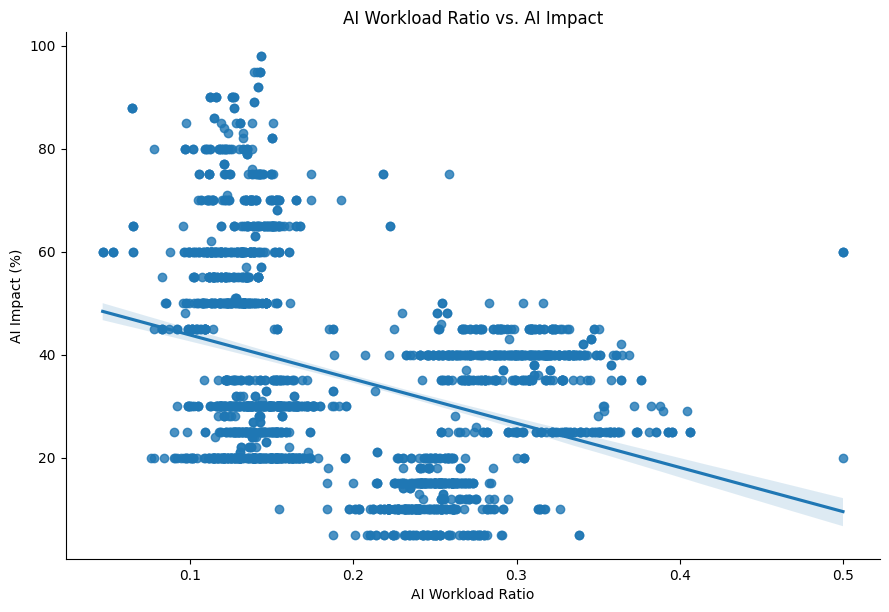

In [29]:
plot_df = df[['AI_Workload_Ratio', 'AI_Impact']].replace([np.inf, -np.inf], np.nan).dropna()

sns.lmplot(x='AI_Workload_Ratio', y='AI_Impact', data=plot_df, height=6, aspect=1.5)
plt.title('AI Workload Ratio vs. AI Impact')
plt.xlabel('AI Workload Ratio')
plt.ylabel('AI Impact (%)')
plt.show()


This scatter plot shows a somewhat negative relationship between AI Workload Ratio and AI Impact, consistent with the regression analysis results. As the AI Workload Ratio (the proportion of tasks already handled by AI) increases, the AI Impact (perceived threat or disruption from AI) tends to decrease. The regression line (in blue) reinforces this negative trend. However, the data points display considerable variability around the line, indicating other factors also influence AI Impact. 

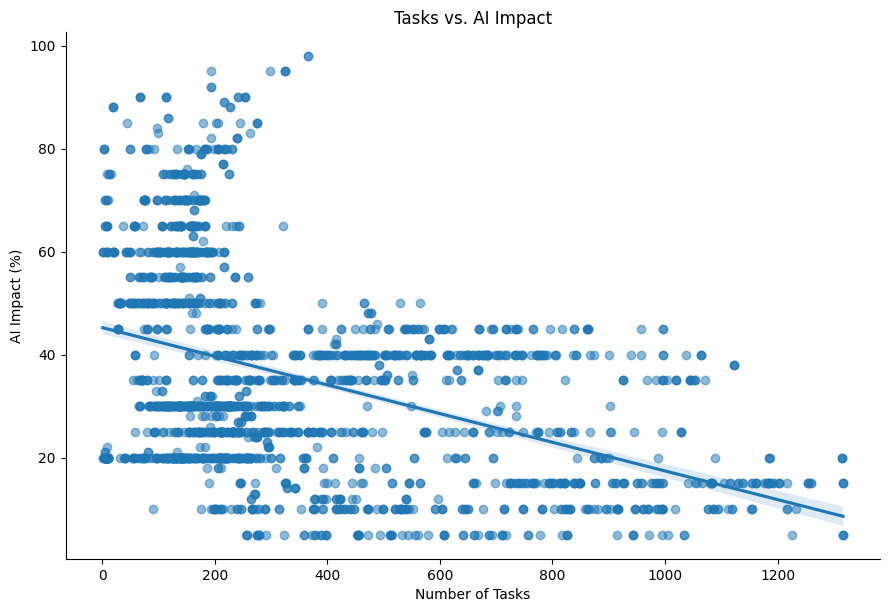

In [43]:
tasks_df = df[['Tasks', 'AI_Impact']].replace([np.inf, -np.inf], np.nan).dropna()

sns.lmplot(x='Tasks', y='AI_Impact', data=tasks_df, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Tasks vs. AI Impact')
plt.xlabel('Number of Tasks')
plt.ylabel('AI Impact (%)')
plt.show()

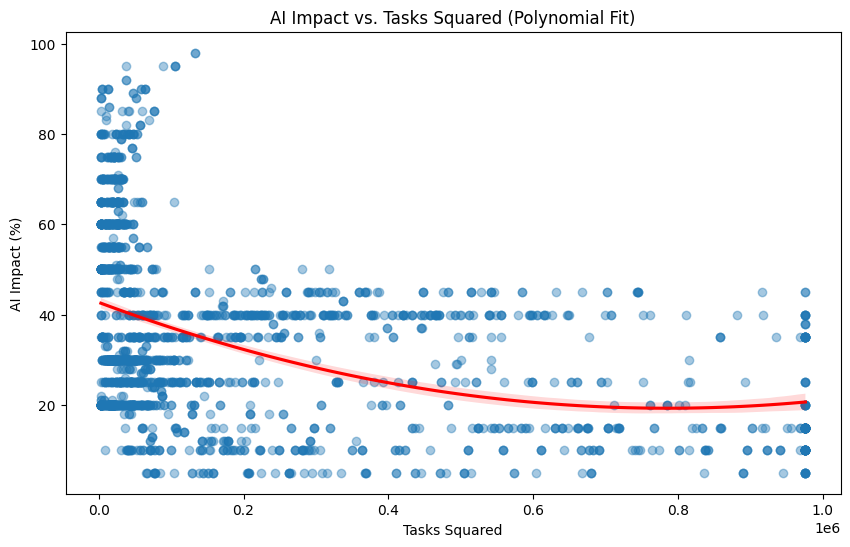

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Tasks is transformed properly
df['Tasks_Squared'] = df['Tasks'] ** 2

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Tasks_Squared'], y=df['AI_Impact'], scatter_kws={'alpha': 0.4}, 
            line_kws={'color': 'red'}, order=2)
plt.title('AI Impact vs. Tasks Squared (Polynomial Fit)')
plt.xlabel('Tasks Squared')
plt.ylabel('AI Impact (%)')
plt.show()


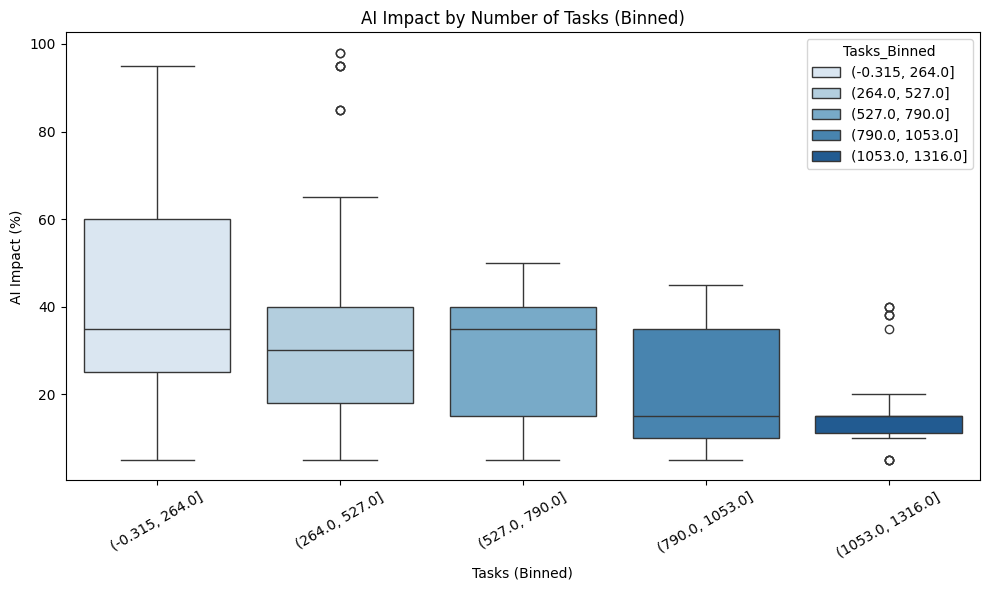

In [49]:
tasks_df['Tasks_Binned'] = pd.cut(tasks_df['Tasks'], bins=5)

plt.figure(figsize=(10,6))
sns.boxplot(x='Tasks_Binned', y='AI_Impact', data=tasks_df, palette='Blues', hue='Tasks_Binned')
plt.title('AI Impact by Number of Tasks (Binned)')
plt.xlabel('Tasks (Binned)')
plt.ylabel('AI Impact (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

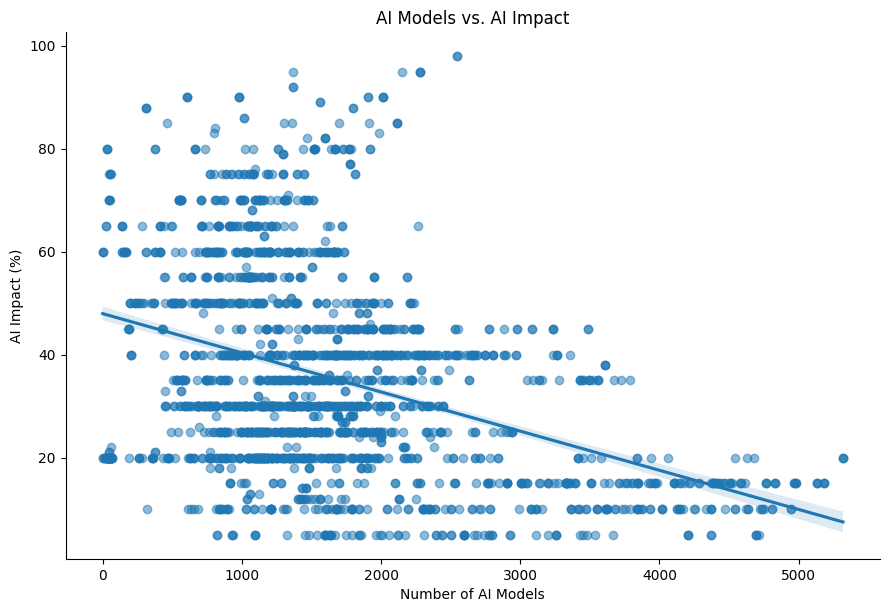

In [40]:
models_df = df[['AI_Models', 'AI_Impact']].replace([np.inf, -np.inf], np.nan).dropna()

sns.lmplot(x='AI_Models', y='AI_Impact', data=models_df, height=6, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('AI Models vs. AI Impact')
plt.xlabel('Number of AI Models')
plt.ylabel('AI Impact (%)')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_clean.drop(columns=['const'])

# compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                            Feature                VIF
1                             Tasks 25.220435732033998
2                         AI_Models 24.678143517971602
3                 AI_Workload_Ratio 10.966846382001105
7                Domain_Hospitality  1.920612739529492
10      Domain_Medical & Healthcare  1.902324242964672
9      Domain_Leadership & Strategy  1.898670379809195
11         Domain_Sales & Marketing  1.837676536347749
12  Domain_Supply Chain & Logistics  1.831612422810451
4         Domain_Communication & PR  1.825833217746469
6                  Domain_Data & IT  1.784510645460141
8            Domain_Law Enforcement  1.750350828884144
5               Domain_Construction  1.738989890486552
0         Average_Normalized_Salary  1.007865672800865


Your VIF (Variance Inflation Factor) results clearly show substantial multicollinearity:

- Tasks (VIF = 25.22) and AI_Models (VIF = 24.68) have very high VIF values, indicating strong collinearity. These two variables are significantly correlated with each other and possibly with other features.
- AI_Workload_Ratio (VIF = 10.97) is also problematic, clearly indicating a high degree of correlation with other predictors, particularly Tasks and AI Models.
- The domains and salary features have low VIF values (< 2), meaning they are safe and don't contribute significantly to multicollinearity.

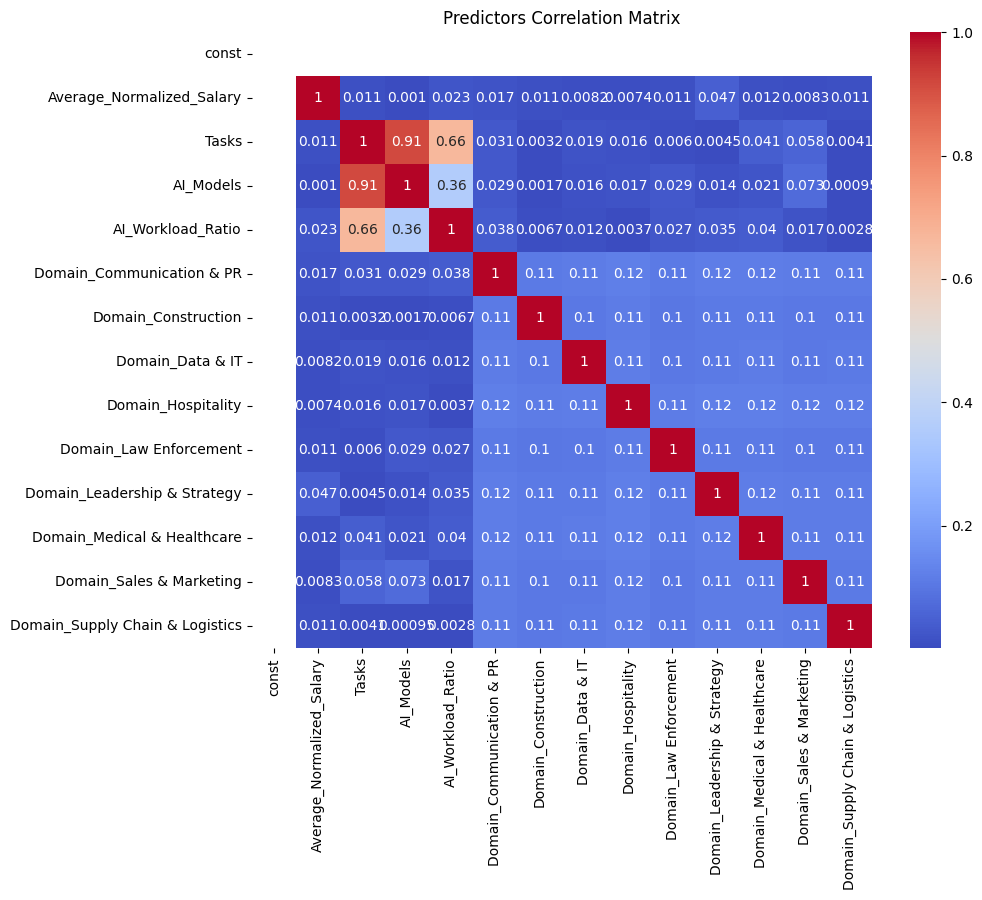

In [ ]:
corr_matrix = X_clean.corr().abs()

# correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Predictors Correlation Matrix')
plt.show()


/usr/local/lib/python3.11/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.11/site-packages/numpy/_core/function_base.py:162: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


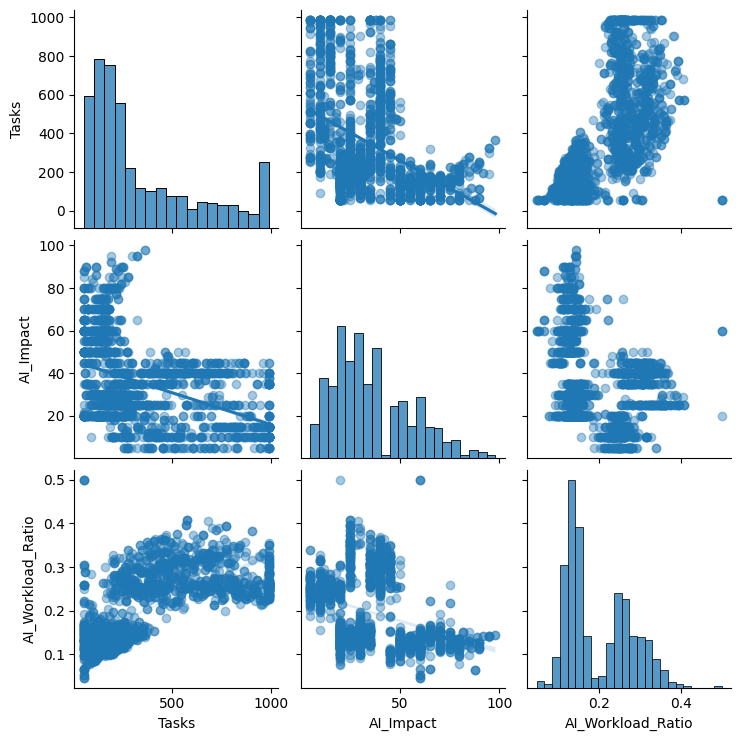

In [ ]:
# pairplot to check correlations between key variables
sns.pairplot(df[['Tasks', 'AI_Impact', 'AI_Workload_Ratio']], kind='reg', plot_kws={'scatter_kws': {'alpha': 0.4}})
plt.show()


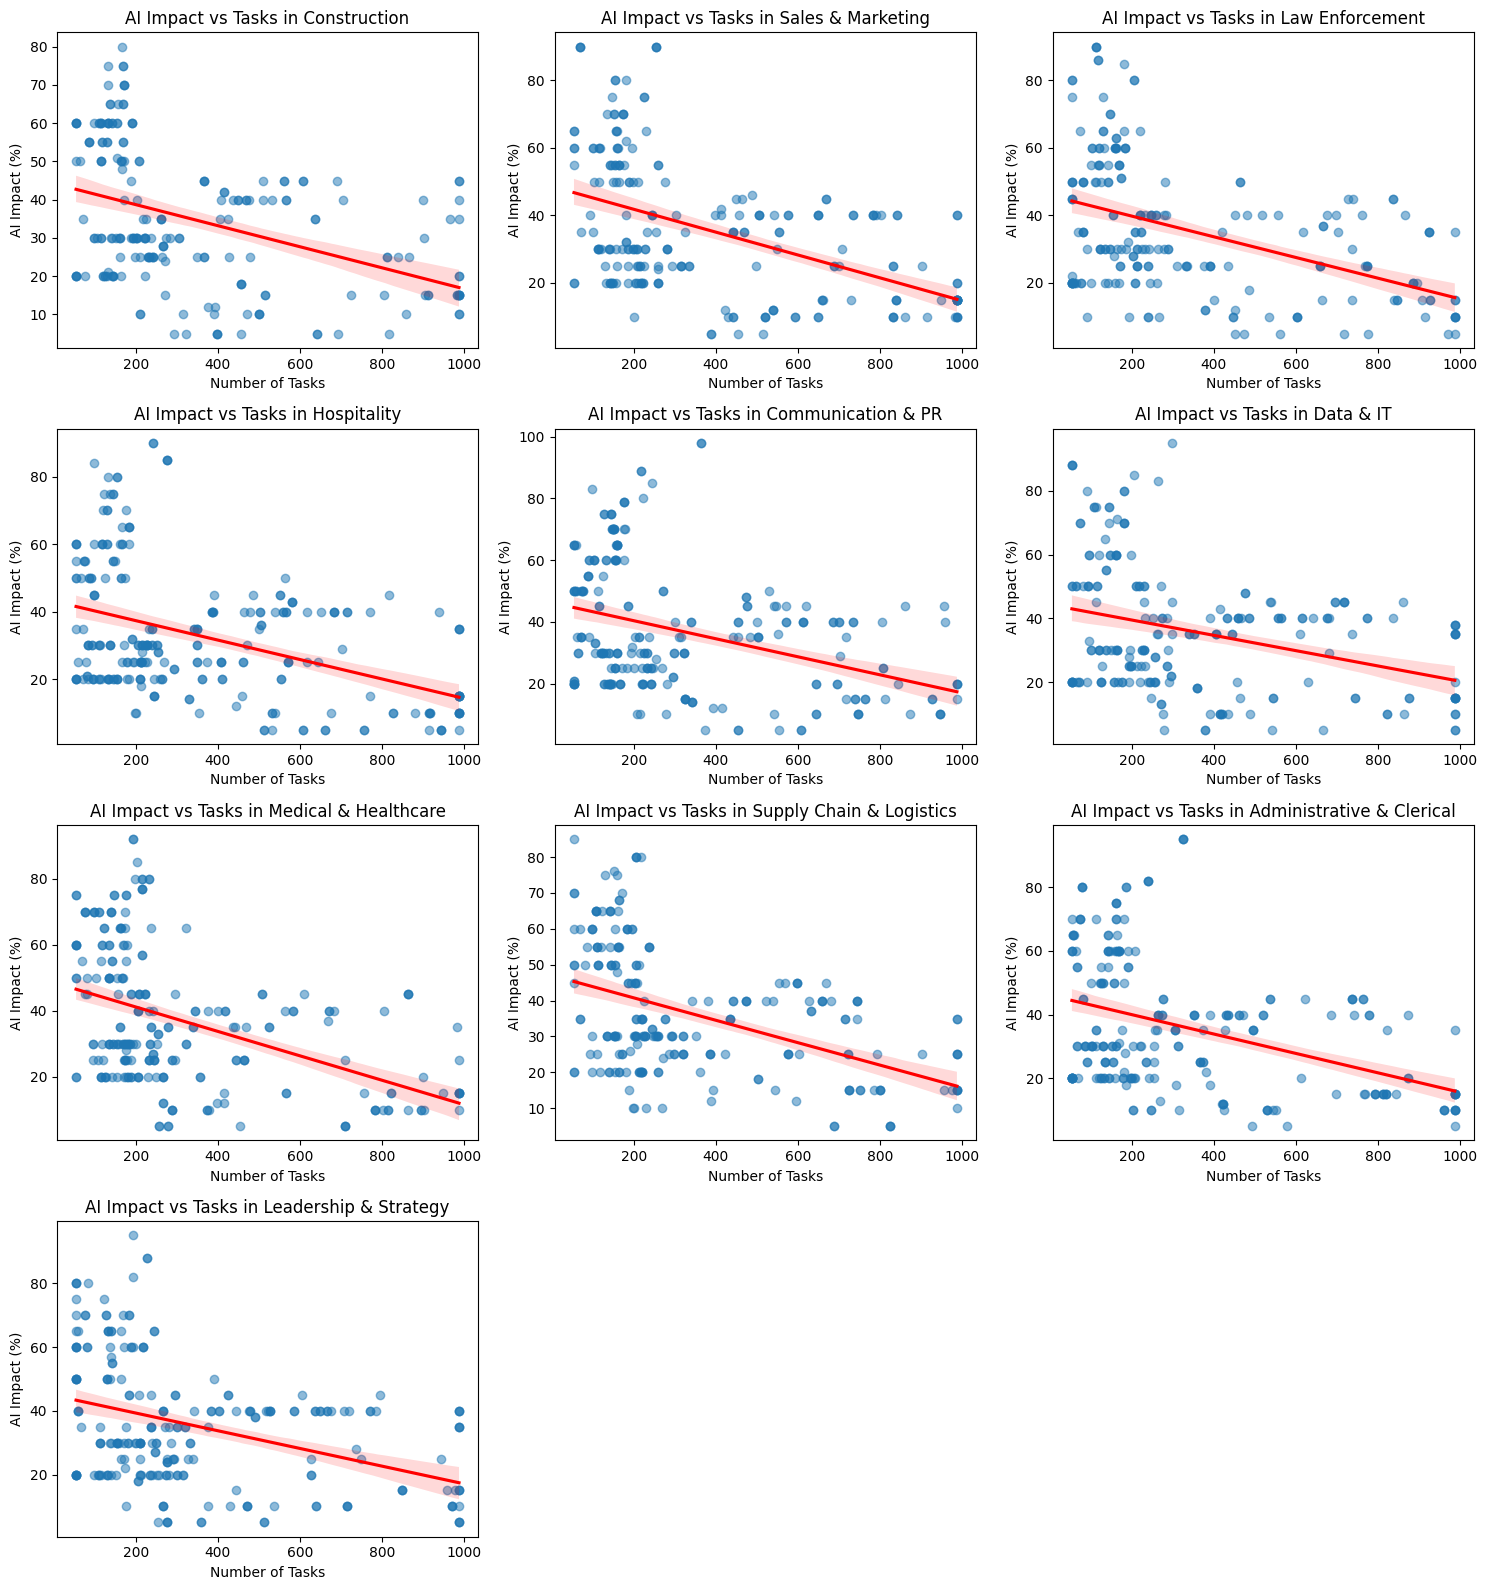

In [93]:
# Determine grid size (e.g., 3x4 for 10 industries)
rows = math.ceil(num_domains / 3)
cols = min(3, num_domains)

# Set up subplots in a grid format
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 4 * rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each industry and create a scatter plot with regression line
for i, domain in enumerate(unique_domains):
    subset = df[df['Domain'] == domain]

    # Scatter plot for AI Impact vs Tasks
    sns.regplot(x=subset['Tasks'], y=subset['AI_Impact'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[i])

    # Titles and labels
    axes[i].set_title(f"AI Impact vs Tasks in {domain}")
    axes[i].set_xlabel("Number of Tasks")
    axes[i].set_ylabel("AI Impact (%)")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


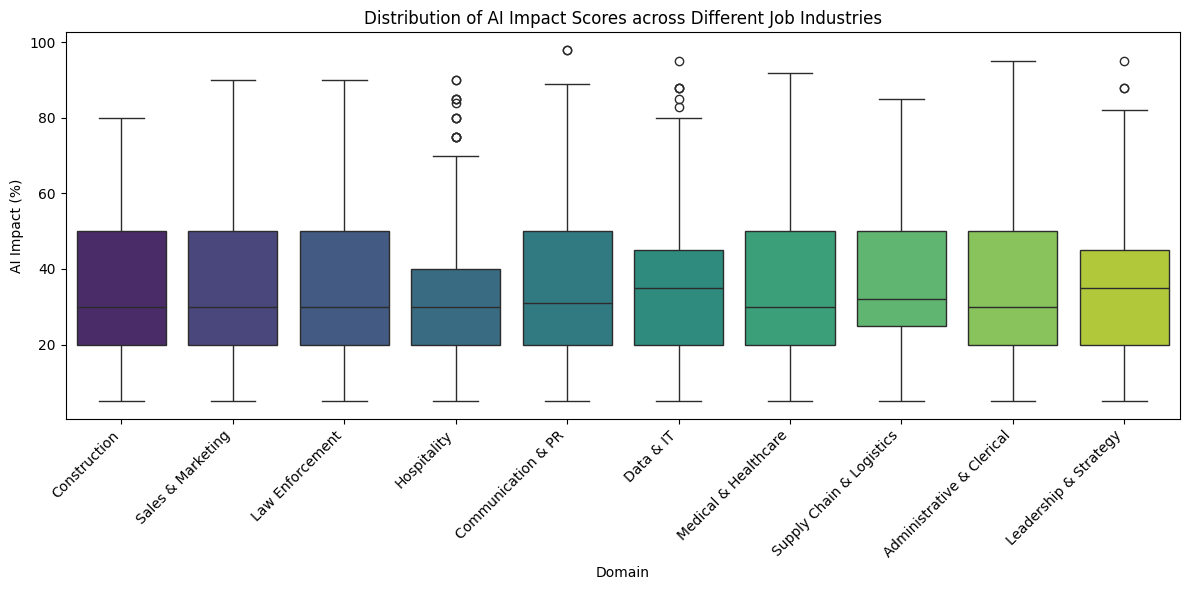

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Domain', y='AI_Impact', data=df, palette='viridis', hue='Domain')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of AI Impact Scores across Different Job Industries')
plt.ylabel('AI Impact (%)')
plt.xlabel('Domain')
plt.tight_layout()
plt.show()

This boxplot clearly illustrates the distribution of AI Impact scores across different job industries (Domains). Although there are some slight visual differences among industries, the median AI impact scores are quite similar across most domains, generally ranging between approximately 20% and 30%. However, certain industries, such as Data & IT, Medical & Healthcare, and Administrative & Clerical, show slightly higher median AI Impact scores, suggesting jobs in these fields may perceive a marginally higher threat from AI

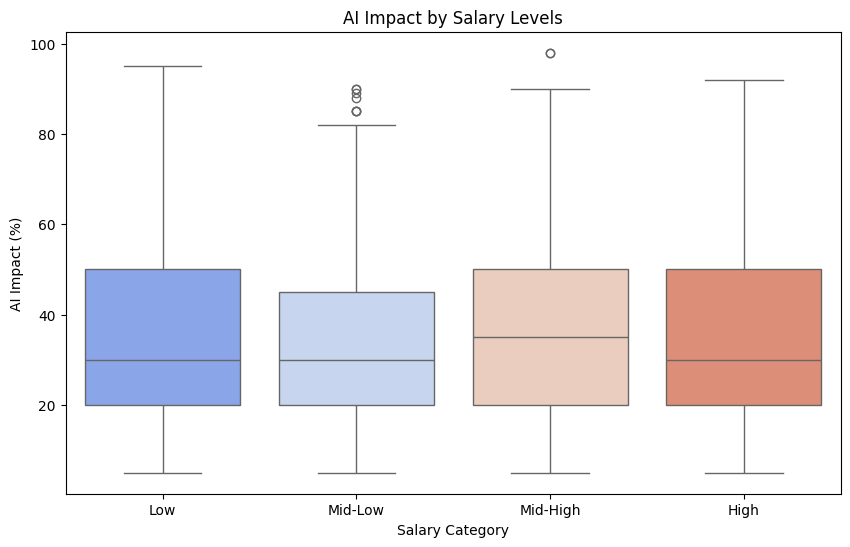

In [68]:
df['Salary_Binned'] = pd.qcut(df['Average_Normalized_Salary'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Salary_Binned', y='AI_Impact', data=df, palette='coolwarm', hue='Salary_Binned')
plt.title('AI Impact by Salary Levels')
plt.xlabel('Salary Category')
plt.ylabel('AI Impact (%)')
plt.show()


The median AI Impact appears relatively stable across salary categories, suggesting no drastic differences in perceived AI threats based on salary alone.